In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df_movies= pd.read_csv("../data/ml-latest/movies.csv")
df_ratings= pd.read_csv("../data/ml-latest/ratings.csv").drop(columns="timestamp")

In [37]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [38]:
df_ratings.describe()

,userId,movieId,rating
count,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00
std,9.534122e+04,4.992865e+04,1.063959e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,8.295300e+04,1.219000e+03,3.000000e+00
50%,1.661290e+05,3.263000e+03,4.000000e+00
75%,2.474500e+05,4.049100e+04,4.000000e+00
max,3.309750e+05,2.889830e+05,5.000000e+00


In [39]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 774.4 MB


In [40]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [41]:
print(df_ratings['userId'].max(), df_ratings['movieId'].max())


330975 288983


In [42]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [43]:
df_ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


## 1.1B)

In [44]:
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].sum().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10

,rating_count
movieId,
318,540156.0
356,462069.0
296,455881.0
2571,445420.5
593,422507.5
260,397789.5
2959,365174.5
527,357340.5
1196,330266.0


In [45]:
title_number_ratings_top10= df_movies.merge(number_ratings_top10, on= "movieId").drop(columns= "genres").sort_values(by="rating_count")

In [46]:
title_number_ratings_top10

,movieId,title,rating_count
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",327700.5
6,1196,Star Wars: Episode V - The Empire Strikes Back...,330266.0
4,527,Schindler's List (1993),357340.5
8,2959,Fight Club (1999),365174.5
0,260,Star Wars: Episode IV - A New Hope (1977),397789.5
5,593,"Silence of the Lambs, The (1991)",422507.5
7,2571,"Matrix, The (1999)",445420.5
1,296,Pulp Fiction (1994),455881.0
3,356,Forrest Gump (1994),462069.0
2,318,"Shawshank Redemption, The (1994)",540156.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Lord of the Rings: The Fellowship of the Ring, The (2001)'),
  Text(1, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

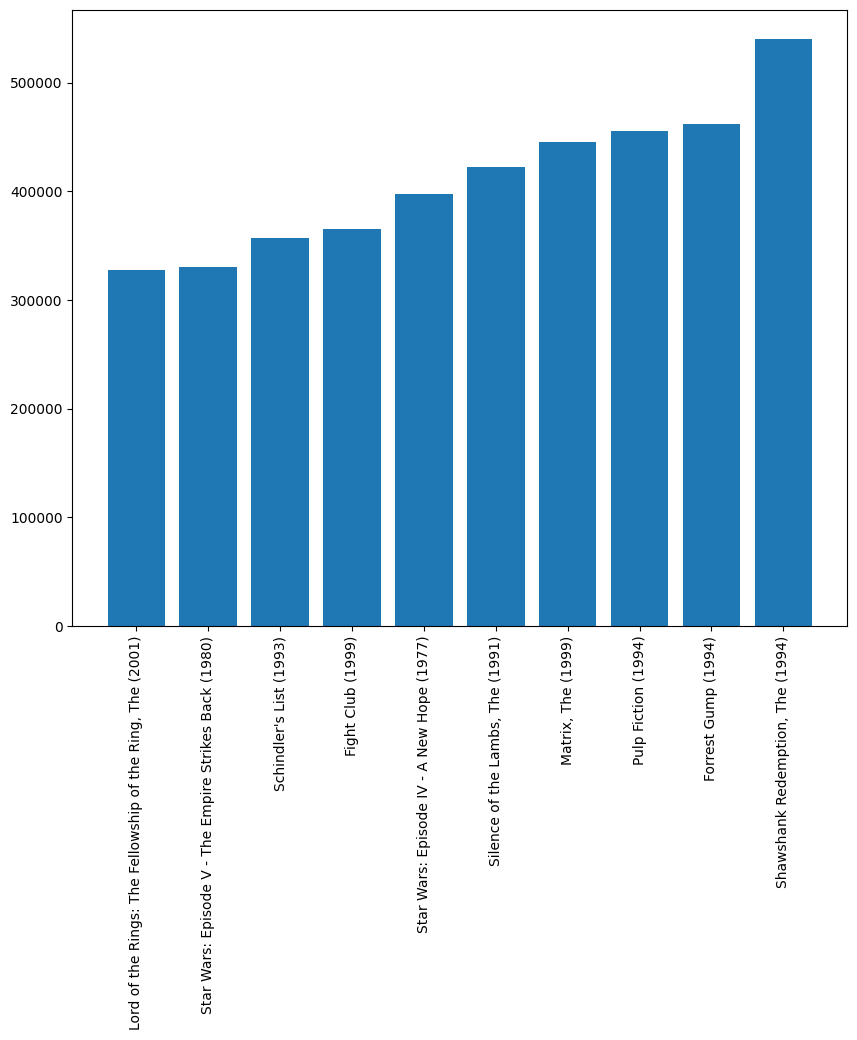

In [47]:
plt.figure(figsize= (10, 8))

plt.bar(title_number_ratings_top10["title"], title_number_ratings_top10["rating_count"])

plt.xticks(rotation= 90)

## 1.1C)

In [48]:
movieids= title_number_ratings_top10["movieId"]
movieids

9    4993
6    1196
4     527
8    2959
0     260
5     593
7    2571
1     296
3     356
2     318
Name: movieId, dtype: int64

In [49]:
top10_movie_ratings= df_ratings[df_ratings["movieId"].isin(movieids)]
top10_movie_ratings

,userId,movieId,rating
3,1,260,4.5
4,1,356,5.0
10,1,1196,3.5
26,1,2571,2.5
38,1,4993,4.0
...,...,...,...
33831877,330975,527,3.5
33831890,330975,593,3.0
33831937,330975,1196,2.5
33832048,330975,2571,3.0


In [50]:
top10_mean_ratings= top10_movie_ratings.groupby("movieId")["rating"].mean()
top10_mean_ratings

movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
4993    4.099331
Name: rating, dtype: float64

In [51]:
title_mean_ratings= df_movies.merge(top10_mean_ratings, on= "movieId").rename(columns= {"rating": "mean_rating"}).sort_values(by= "mean_rating").drop(columns={"genres"}).set_index("movieId")

In [52]:
title_mean_ratings

,title,mean_rating
movieId,,
356,Forrest Gump (1994),4.068189
260,Star Wars: Episode IV - A New Hope (1977),4.092400
4993,"Lord of the Rings: The Fellowship of the Ring,...",4.099331
1196,Star Wars: Episode V - The Empire Strikes Back...,4.118030
593,"Silence of the Lambs, The (1991)",4.150287
2571,"Matrix, The (1999)",4.160631
296,Pulp Fiction (1994),4.191778
2959,Fight Club (1999),4.236019
527,Schindler's List (1993),4.242337


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Forrest Gump (1994)'),
  Text(1, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(2, 0, 'Lord of the Rings: The Fellowship of the Ring, The (2001)'),
  Text(3, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(4, 0, 'Silence of the Lambs, The (1991)'),
  Text(5, 0, 'Matrix, The (1999)'),
  Text(6, 0, 'Pulp Fiction (1994)'),
  Text(7, 0, 'Fight Club (1999)'),
  Text(8, 0, "Schindler's List (1993)"),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

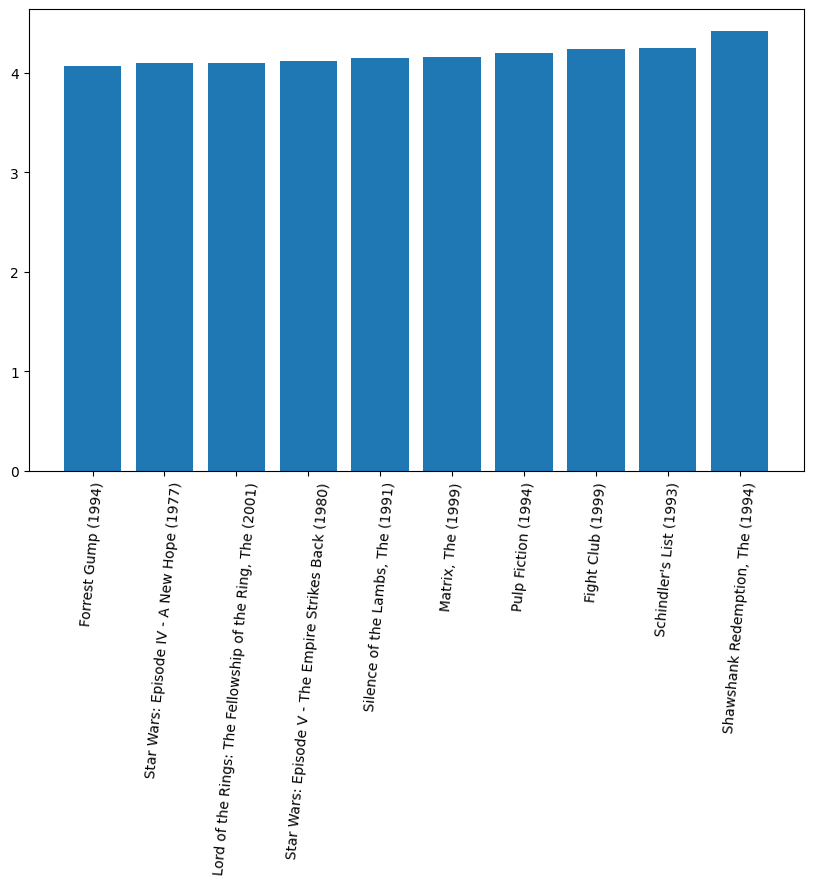

In [53]:
plt.figure(figsize= (10, 6))

plt.bar(title_mean_ratings["title"], title_mean_ratings["mean_rating"])
plt.xticks(rotation= 85)

## 1.1D)

In [54]:
df_movies["year"]= df_movies["title"].str.extract(r"\((\d{4})\)")
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023


In [119]:
total_movie_year= df_movies.groupby("year")["year"].count().reset_index(name= "count").astype(int)
total_movie_year

,year,count
0,1874,1
1,1878,2
2,1880,1
3,1882,1
4,1883,1
...,...,...
137,2019,3058
138,2020,2628
139,2021,2297
140,2022,1962


([<matplotlib.axis.XTick at 0x23531a58ed0>,
 [Text(1870, 0, '1870'),
  Text(1870, 0, '1870'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text

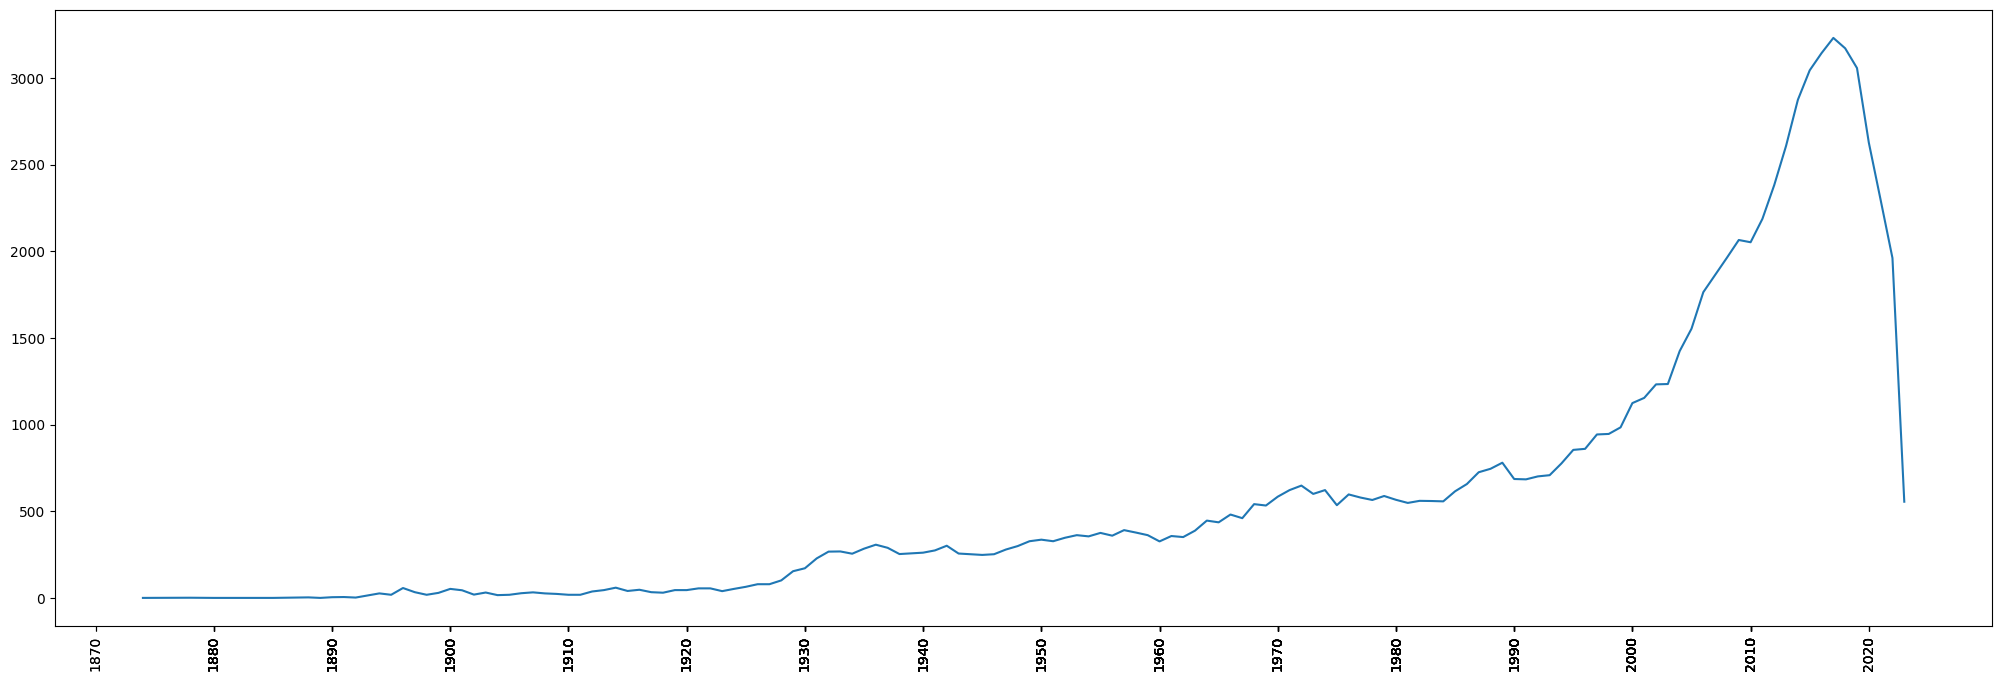

In [127]:
labels= (total_movie_year["year"]// 10)* 10

plt.figure(figsize= (25, 8))

plt.plot(total_movie_year["year"], total_movie_year["count"])

plt.xticks(rotation= 90, ticks= labels)